In [2]:
from PIL import Image
import numpy

In [3]:
import matplotlib.pyplot as plt

In [4]:
import scipy as sp

# $$ I = I_1 + I_2 + 2I_1I_2cos(\Delta \phi)$$

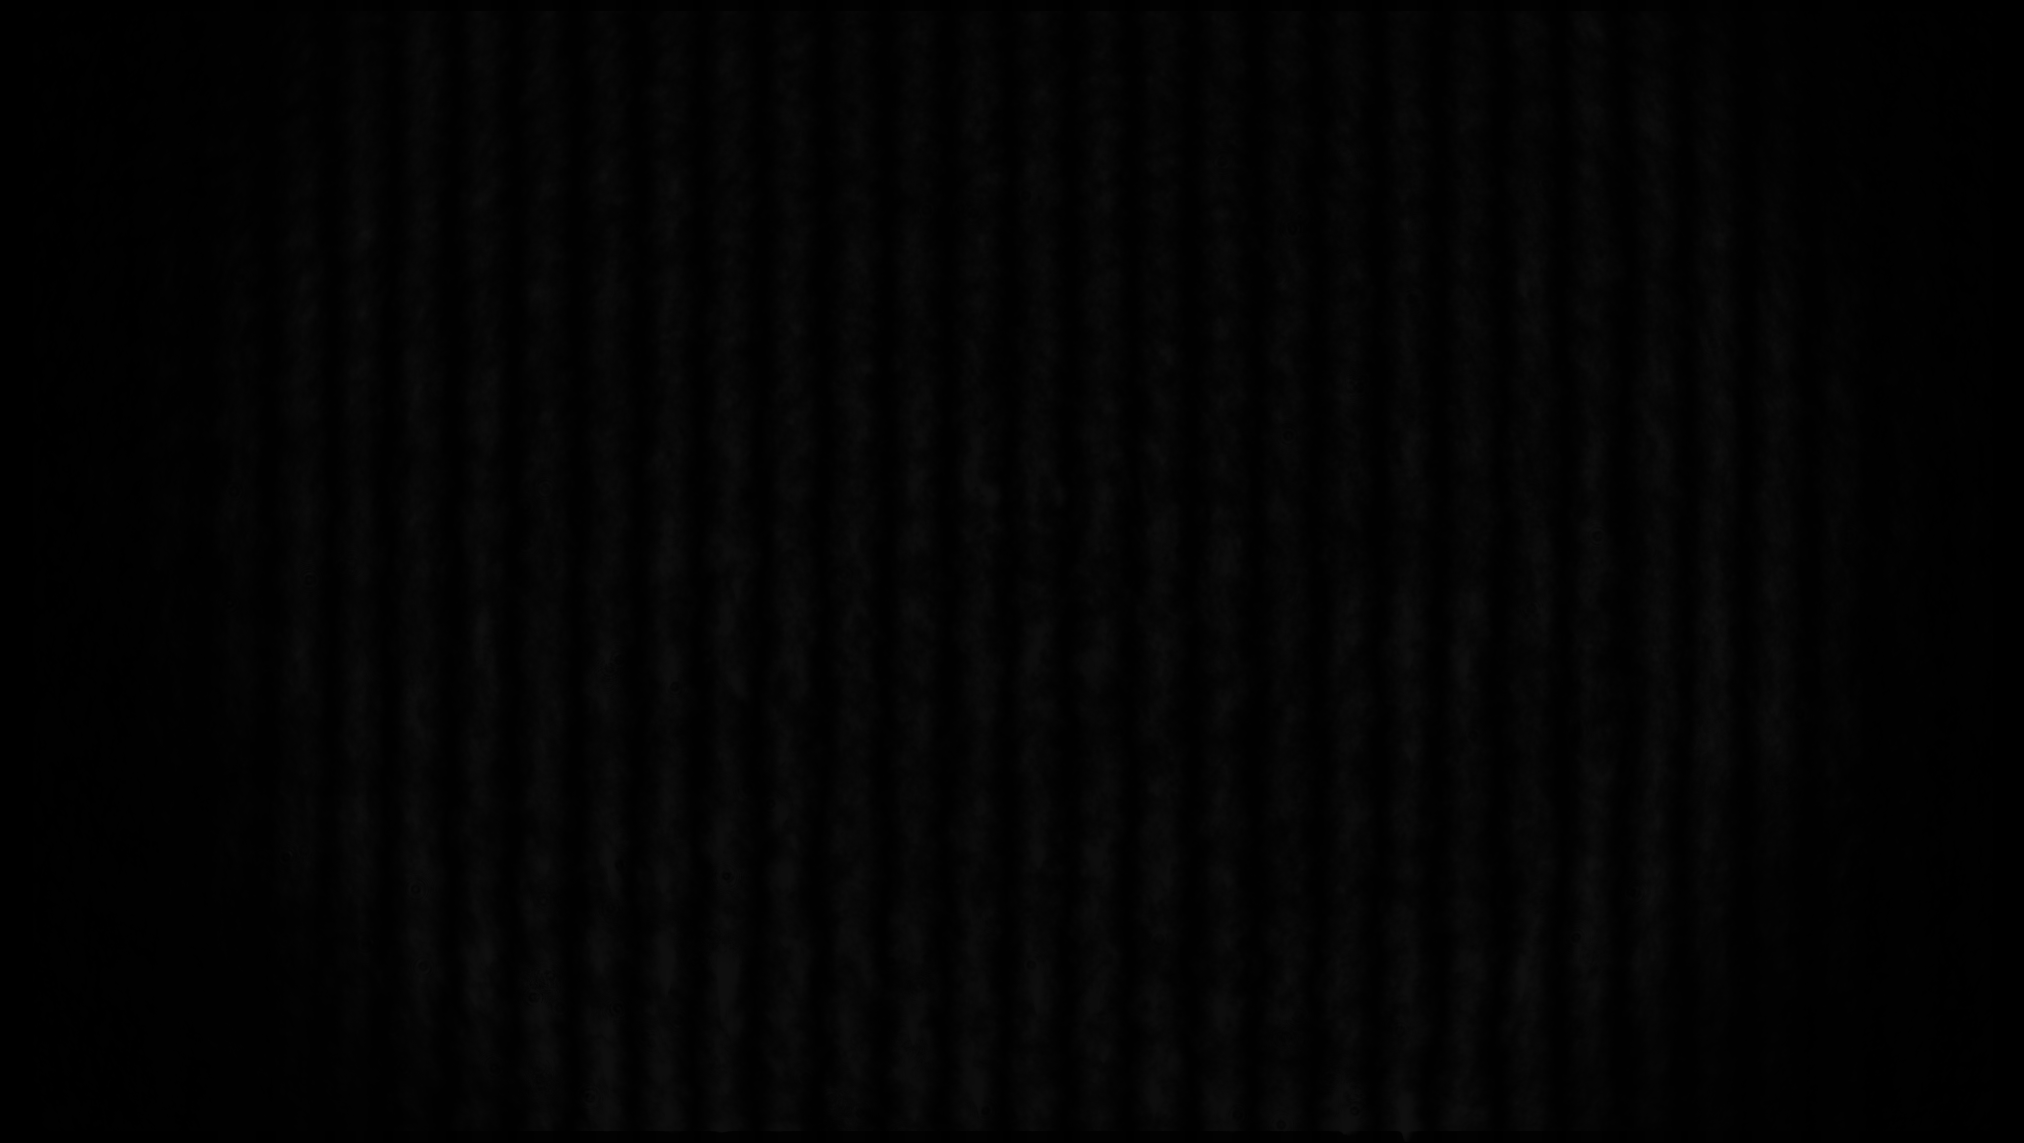

In [66]:
Image.open('xall.tiff', 'r')

In [5]:
class interference:
    def __init__(self, black, first, second, interf ):
        self.blackIm = Image.open(black)
        self.blackArray = numpy.asarray(self.blackIm)
        self.firstIm = Image.open(first)
        self.firstArray = numpy.asarray(self.firstIm)
        self.secondIm = Image.open(second)
        self.secondArray = numpy.asarray(self.secondIm)
        self.interfIm = Image.open(interf)
        self.interfArray = numpy.asarray(self.interfIm)
        self.numberOfArrays = self.firstArray.shape[0]
        self.arrayLen = self.firstArray.shape[1]
        self.normalize()
        self.firstCut = self.firstNormArray.copy()
        self.secondCut = self.secondNormArray.copy()
        self.interfCut = self.interfNormArray.copy()
        self.firstAvg = []
        self.secondAvg = []
        self.interfAvg = []
        self.cos = []
        self.arccos = []
    def normalize(self):
        self.firstNormArray = self.firstArray.copy()#numpy.zeros(self.firstArray.shape)
        self.secondNormArray = self.secondArray.copy() #numpy.zeros(self.firstArray.shape)
        self.interfNormArray = self.firstArray.copy() #numpy.zeros(self.firstArray.shape)
        for i in range(self.numberOfArrays):
            for j in range(self.arrayLen):
                if (self.blackArray[i][j] < self.firstArray[i][j]):
                    self.firstNormArray[i][j] = (self.firstArray[i][j] - self.blackArray[i][j])
                else: 
                    self.firstNormArray[i][j] = 0
                if (self.blackArray[i][j] < self.secondArray[i][j]):
                    self.secondNormArray[i][j] = (self.secondArray[i][j] - self.blackArray[i][j])
                else: 
                    self.secondNormArray[i][j] = 0
                if (self.blackArray[i][j] < self.interfArray[i][j]):
                    self.interfNormArray[i][j] = (self.interfArray[i][j] - self.blackArray[i][j])
                else: 
                    self.interfNormArray[i][j] = 0
    def cutMiddle(self, size):
        self.cutSize = size
        center = self.numberOfArrays // 2
        #center = 550
        start = center - size // 2
        self.firstCut = self.firstNormArray[start:(start + size)]
        self.secondCut = self.secondNormArray[start:(start + size)]
        self.interfCut = self.interfNormArray[start:(start + size)]
        self.firstCutOrig = self.firstArray[start:(start + size)]
        self.secondCutOrig = self.secondArray[start:(start + size)]
        self.interfCutOrig = self.interfArray[start:(start + size)]
        self.blackCutOrig = self.blackArray[start:(start + size)]
    def countAverage(self):
        for i in range(self.cutSize):
            colFirst = [self.firstCut[i][j] for j in range(self.arrayLen)]
            colSecond = [self.secondCut[i][j] for j in range(self.arrayLen)]
            colInterf = [self.interfCut[i][j] for j in range(self.arrayLen)]
        self.firstAvg =[numpy.average(colFirst[i]) for i in range(self.arrayLen)]
        self.secondAvg =[numpy.average(colSecond[i]) for i in range(self.arrayLen)]
        self.interfAvg =[numpy.average(colInterf[i]) for i in range(self.arrayLen)]
    def countCos(self):
        self.cos = []
        for i in range(self.arrayLen):
            if (self.firstAvg[i] > 0.01 and self.secondAvg[i] > 0.01):
                cosItem = (self.interfAvg[i] - self.firstAvg[i] - self.secondAvg[i])/(2*(self.firstAvg[i]*self.secondAvg[i])**(0.5))
            else:
                cosItem = 0
            if (cosItem > 1):
                cosItem = 1
            elif (cosItem < -1):
                cosItem = -1
            self.cos.append(cosItem)
    def countArccos(self):
        self.arccos = [numpy.arccos(c) for c in self.cos]
    def countPhase(self):
        self.phase = []
        self.phase.append(self.arccos[0])
        for i in range(len(self.arccos) - 1):
            last = self.arccos[i]
            cur =  self.arccos[i + 1]
            delta = numpy.abs(cur - last)
            self.phase.append(self.phase[-1] + delta)
        fp = sp.polyfit([i for i in range(len(self.phase))], self.phase, 1)
        f = sp.poly1d(fp)
        self.phaseAppr = [f(i) for i in range(len(self.phase))]
        self.profile = [(self.phase[j] - self.phaseAppr[j]) for j in range(len(self.phaseAppr))]
        self.aver = numpy.mean(self.profile)
        self.rms = numpy.std(self.profile)
    def countAll(self):
        self.cutMiddle(100)
        self.countAverage()
        self.countCos()
        self.countArccos()
        self.countPhase()

In [129]:
int1 = interference('x0.tiff', 'x1.tiff', 'x2.tiff', 'xall.tiff')


(1143, 2024)

In [130]:
int1.cutMiddle(100)

In [104]:
a0 = numpy.asarray(int1.blackArray)
a1 = numpy.asarray(int1.firstIm)
a2 = numpy.asarray(int1.secondIm)
a3 = numpy.asarray(int1.inter)

In [124]:
int1.interfCut

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   1.,   0., ...,   0.,   0.,   0.],
       [  0.,   1.,   1., ...,   0.,   0.,   0.],
       [141., 141., 142., ...,   0.,   0.,   0.]])

In [154]:
im0 = Image.fromarray(int1.blackCutOrig)
im1 = Image.fromarray(int1.firstCut)
im2 = Image.fromarray(int1.secondCut)
im3 = Image.fromarray(int1.interfCut)
im3.show()

In [156]:
im2.show()

In [119]:
int1.cutMiddle(100)
int1.countAverage()
int1.countCos()
int1.countArccos()

<ipython-input-102-b8bcf29d162f>:73: RuntimeWarning: invalid value encountered in arccos
  self.arccos = [numpy.arccos(c) for c in self.cos]


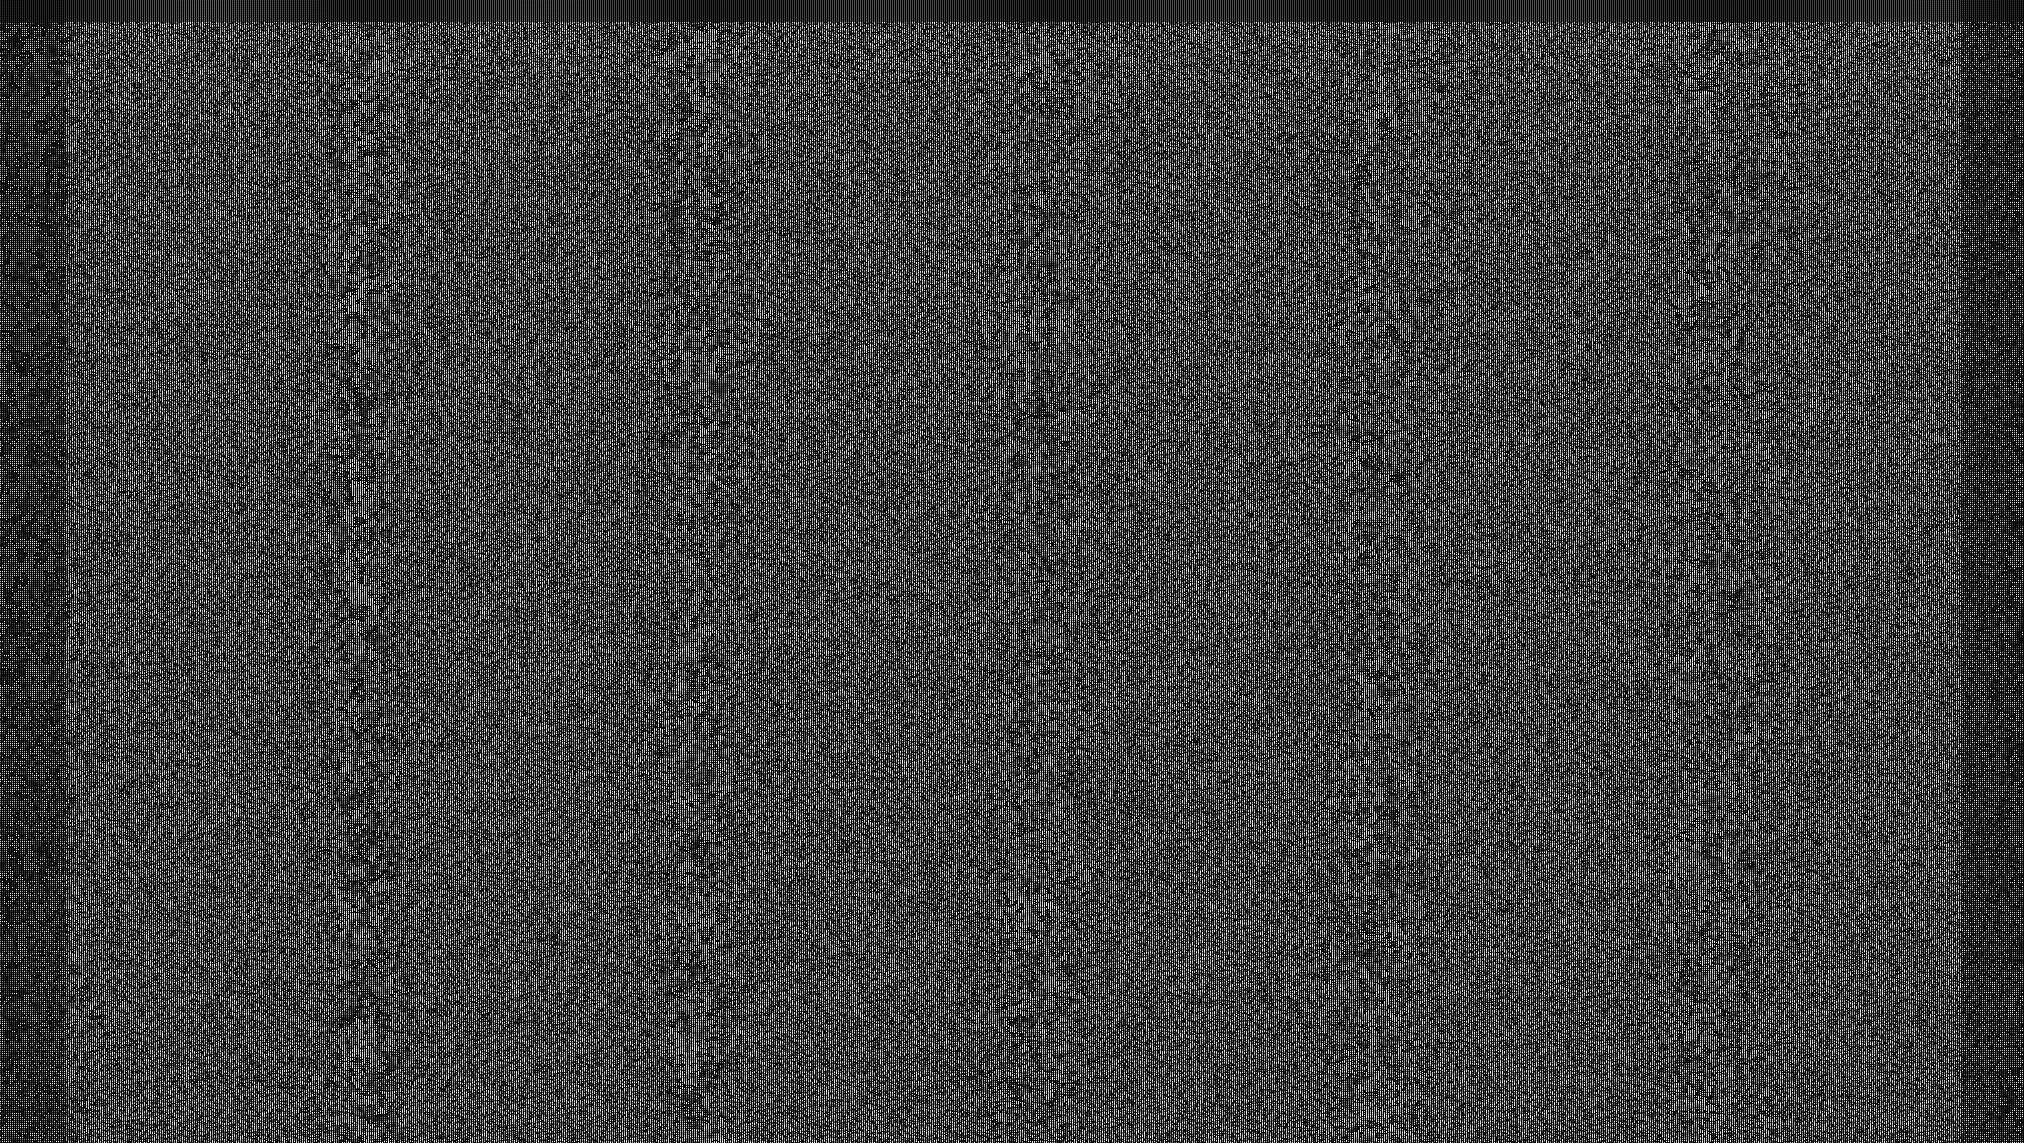

In [87]:
Image.fromarray(int2.interfArray, 'P')

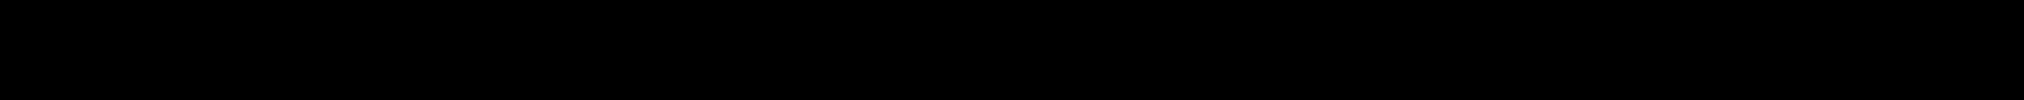

In [110]:
Image.fromarray(int1.blackCutOrig)

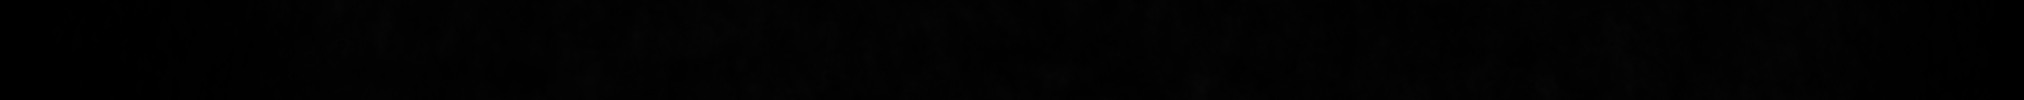

In [112]:
Image.fromarray(int1.secondCutOrig)

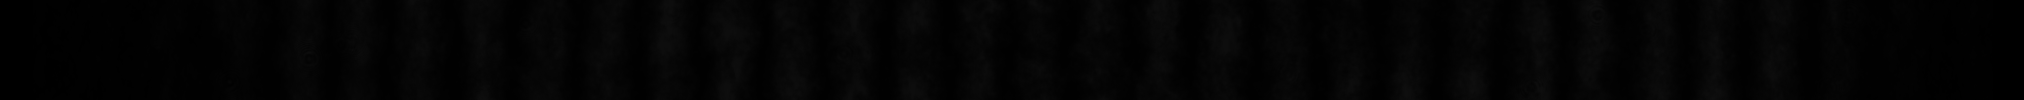

In [113]:
Image.fromarray(int1.interfCutOrig)

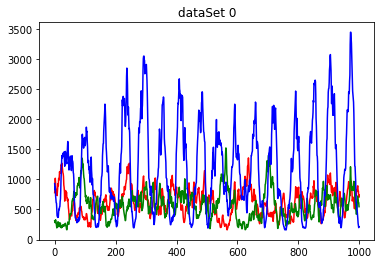

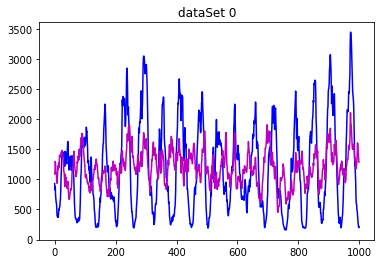

In [318]:
fig1, ax1 = plt.subplots(1)
plt.title('dataSet 0')
fig2, ax2 = plt.subplots(1)
plt.title('dataSet 0')
n = 30
ax1.plot(int1.firstAvg[500:1500], color='r') 
ax1.plot(int1.secondAvg[500:1500], color='g') 
#ax1.plot(int1.firstCut[70], color = 'g')
ax1.plot(int1.interfAvg[500:1500], color='b') 
ax2.plot(int1.interfAvg[500:1500], color = 'b')
ax2.plot([int1.secondAvg[i]+int1.firstAvg[i]  for i in range(500, 1500)], color='m')
#ax1.grid(True)
plt.show()

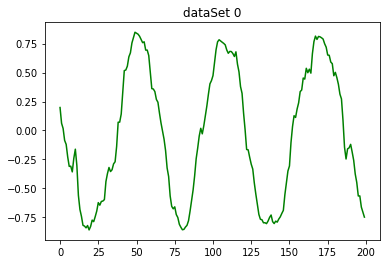

In [285]:
fig1, ax1 = plt.subplots(1)
plt.title('dataSet 0')
ax1.plot(int1.cos[250:450], color='g')

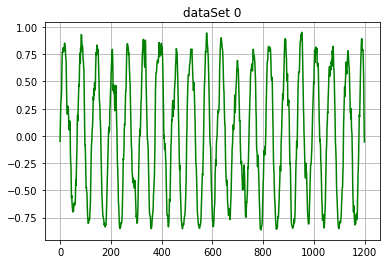

In [319]:
fig3, ax3 = plt.subplots(1)
plt.title('dataSet 0')
ax3.grid(True)
ax3.plot(int1.cos[400:1600], color='g')

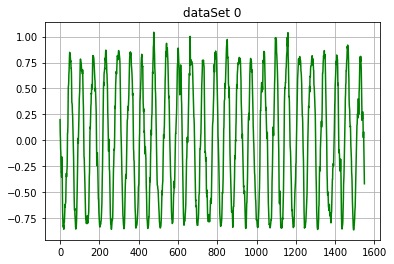

In [311]:
fig3, ax3 = plt.subplots(1)
plt.title('dataSet 0')
ax3.grid(True)
ax3.plot(int1.cos[250:1800], color='g')

In [310]:
max(int1.cos[250:1800])

1.0421243518610448

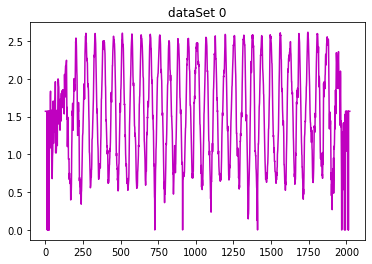

In [289]:
fig4, ax4 = plt.subplots(1)
plt.title('dataSet 0')
ax4.plot(int1.arccos, color='m')

In [6]:
int2 = interference('my_data/x0.tiff', 'my_data/x1.tiff', 'my_data/x2.tiff', 'my_data/xall.tiff')

In [7]:
int2.countAll()

<ipython-input-5-660688ac4182>:82: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fp = sp.polyfit([i for i in range(len(self.phase))], self.phase, 1)


In [209]:
int2.cutMiddle(100)
int2.countAverage()
int2.countCos()
int2.countArccos()

In [164]:
Image.fromarray(int2.blackCutOrig).show()

In [165]:
Image.fromarray(int2.firstCut).show()

In [166]:
Image.fromarray(int2.secondCut).show()

In [167]:
Image.fromarray(int2.interfCut).show()

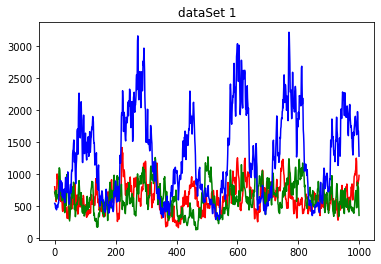

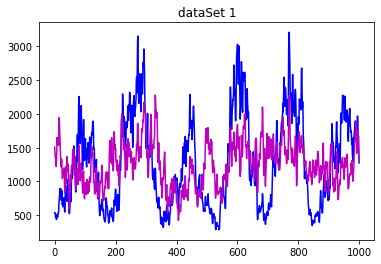

In [210]:
fig21, ax21 = plt.subplots(1)
plt.title('dataSet 1')
fig22, ax22 = plt.subplots(1)
ax21.plot(int2.firstAvg[500:1500], color='r') 
ax21.plot(int2.secondAvg[500:1500], color='g') 
#ax1.plot(int1.firstCut[70], color = 'g')
ax21.plot(int2.interfAvg[500:1500], color='b') 
ax22.plot(int2.interfAvg[500:1500], color = 'b')
ax22.plot([int2.secondAvg[i]+int2.firstAvg[i]  for i in range(500, 1500)], color='m')
#ax1.grid(True)
plt.title('dataSet 1')
plt.show()

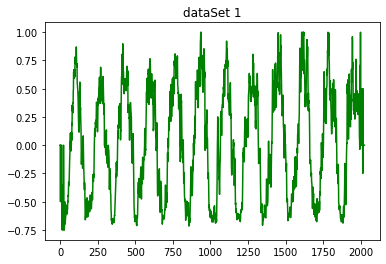

In [211]:
fig23, ax23 = plt.subplots(1)
plt.title('dataSet 1')
ax23.plot(int2.cos, color='g')

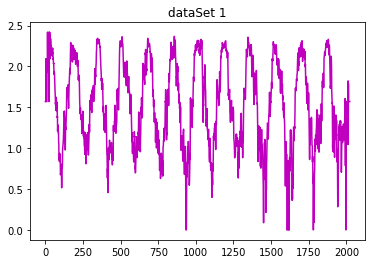

In [212]:
fig24, ax24 = plt.subplots(1)
plt.title('dataSet 1')
ax24.plot(int2.arccos, color='m')

<ipython-input-245-660688ac4182>:82: DeprecationWarning: scipy.polyfit is deprecated and will be removed in SciPy 2.0.0, use numpy.polyfit instead
  fp = sp.polyfit([i for i in range(len(self.phase))], self.phase, 1)


<bound method Axes.plot of <AxesSubplot:title={'center':'dataSet 1'}>>

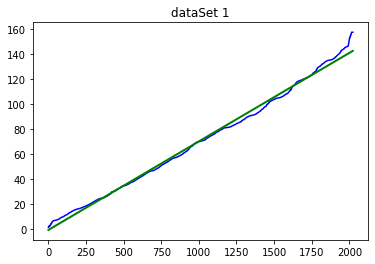

In [247]:
int2.countAll()
fig25, ax25 = plt.subplots(1)
plt.title('dataSet 1')
ax25.plot(int2.phase, color='b')
ax25.plot(int2.phaseAppr, linewidth=2, color='g')
ax25.plot

<bound method Axes.plot of <AxesSubplot:title={'center':'dataSet 1'}>>

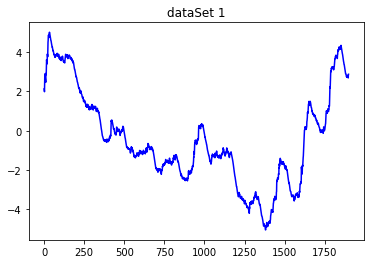

In [14]:
fig26, ax26 = plt.subplots(1)
plt.title('dataSet 1')
ax26.plot(int2.profile[:1900], color='b')
#ax25.plot(int2.phaseAppr, linewidth=2, color='g')
ax26.plot

In [16]:
max(int2.profile[:1900])- min(int2.profile[:1900])

10.043839420371256

In [17]:
int2.rms

3.03100033130683